In [1]:
'''
Neural Network Model for Predicting Graduate School Admissions
This model predicts the probability of an international student gaining admission to an American graduate school 
The model can be adapted for domestic students as well.
Author: Bilal Kudaimi
Date: 2022-05-21
'''

#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
admit_df = pd.read_csv('Admission_Predict.csv')
admit_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#Viewing the shape of the dataset
admit_df.shape

(400, 9)

In [4]:
#Checking the dataset for NA values
admit_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
#Making sure the columns are numerical
admit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
#Describing the data frame
admit_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
#The standard for GPA is out of 4, so the GPA column will be changed to a scale of 4.
admit_df['CGPA'] = (admit_df['CGPA'] / 10) * 4

In [8]:
#Viewing the data frame now
admit_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,3.860,1,0.92
1,2,324,107,4,4.0,4.5,3.548,1,0.76
2,3,316,104,3,3.0,3.5,3.200,1,0.72
3,4,322,110,3,3.5,2.5,3.468,1,0.80
4,5,314,103,2,2.0,3.0,3.284,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,3.616,1,0.82
396,397,325,107,3,3.0,3.5,3.644,1,0.84
397,398,330,116,4,5.0,4.5,3.780,1,0.91
398,399,312,103,3,3.5,4.0,3.512,0,0.67


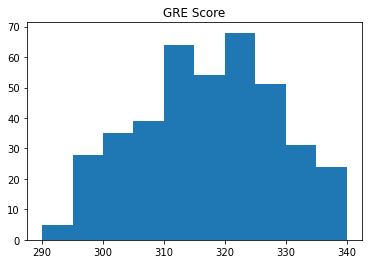

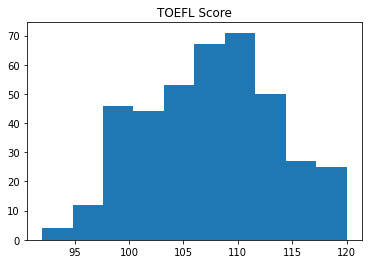

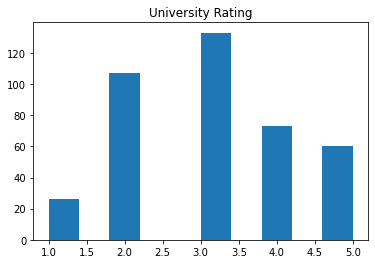

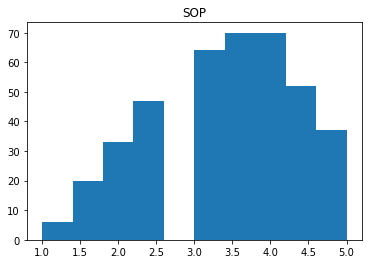

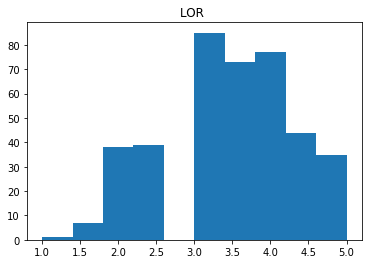

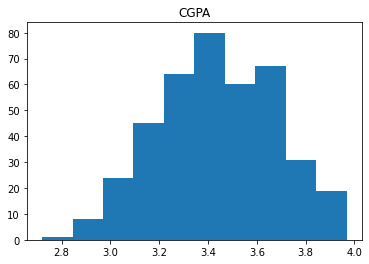

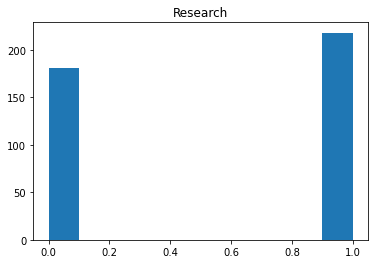

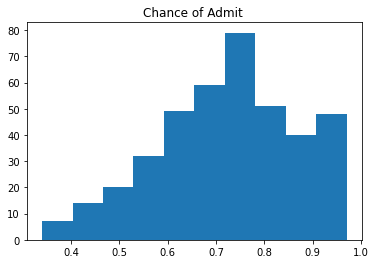

In [9]:
#Plotting histograms of the data
for i in admit_df.columns[1:]:
    plt.hist(admit_df[i][1:])
    plt.title(i)
    plt.show()

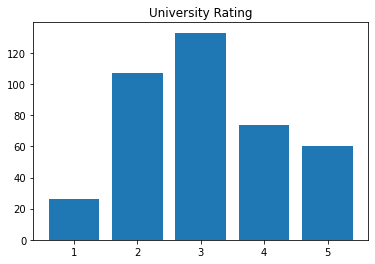

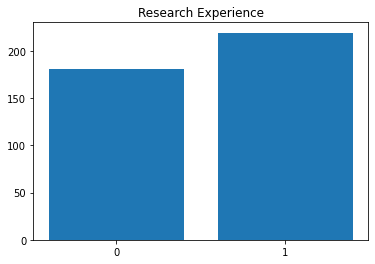

In [10]:
#University rating and Research are revealed to be categorical variables, so bar charts will be plotted of them
A = admit_df['University Rating'].value_counts().index
B = admit_df['University Rating'].value_counts().values
plt.bar(A, B)
plt.title('University Rating')
plt.show()

A = admit_df['Research'].value_counts().index
B = admit_df['Research'].value_counts().values
plt.bar(A, B)
plt.title('Research Experience')
plt.xticks(np.arange(min(A), max(A) + 1, 1))
plt.show()

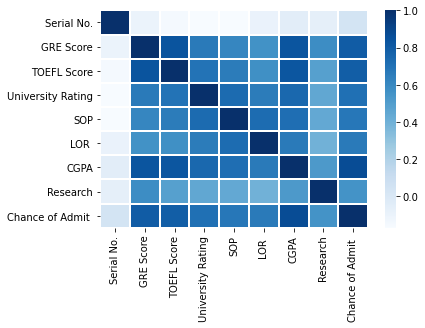

In [11]:
#Checking the correlations in the data frame
sns.heatmap(admit_df.corr(), cmap = 'Blues', linewidths = 1)
plt.show()

In [12]:
#Splitting the target column from the rest of the data frame
x = admit_df.iloc[:, 1:8]
y = admit_df['Chance of Admit ']

In [13]:
#Splitting into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
#Scaling the features 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#Defining the neural network model with 3 layers 
#The first 2 have 7 neurons and ReLU activation and the last 1 has a neuron with linear activation.
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [16]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Training the model with 100 epochs and mean squared error as the scoring metric
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 2s 217ms/step - loss: 0.0895 - val_loss: 0.0531
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0442 - val_loss: 0.0324
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0336 - val_loss: 0.0295
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0296 - val_loss: 0.0271
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0256 - val_loss: 0.0242
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0253 - val_loss: 0.0221
Epoch 7/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 8/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0206 - val_loss: 0.0197
Epoch 9/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0218 - val_loss: 0.0186
Epoch 10/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0171 - val_loss: 0.0177
Epoch 11/100
8/8 [

Epoch 84/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 85/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 86/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 87/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 88/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 89/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 90/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 91/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 92/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0051 - val_loss: 0.0042
Epoch 93/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 94/1

In [18]:
#Getting the ending loss and R2 value of the model and rounding (since R2 is also used to evaluate regression problems)
y_pred = model.predict(X_test_scaled)
R_2 = round(r2_score(y_test,y_pred), 4)
print('R-squared of the model: {}'.format(R_2))

R-squared of the model: 0.8103


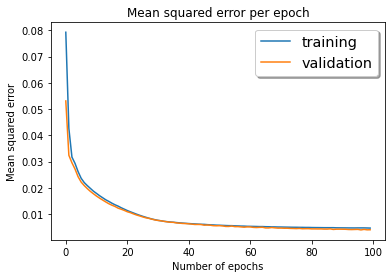

In [19]:
#Plotting the error per epoch to see if the model is performing well
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend(loc = 'upper right', shadow = True, fontsize = 'x-large')
plt.xlabel('Number of epochs')
plt.ylabel('Mean squared error')
plt.title('Mean squared error per epoch')
plt.show()